In [5]:
#https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

import os

## Time Series Analysis 

A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


Components of a Time-Series

* Trend - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
* Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
* Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
* Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
* ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

We have pooled data - which is a collection of the observations of the values of variables recorded at different points in time for several variables. Here, we are looking at stocks and cryptocurrencies

In [4]:
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


Let us look at the average/mean daily closing price of the selected stocks

In [13]:
tickers = [
 'MSFT',
 'AAPL', 
 'Visa', 
 'JPM',
 'UNH', 
 'WMT',
 'JNJ',
 'PG', 
 'HD', 
 'MRK',
 'CVX',
 'CRM',
 'KO',
 'MCD', 
 'CSCO',
 'INTC',
 'DIS',
 'VZ',
 'AMGN', 
 'IBM',
 'CAT',
 'NKE',
 'AXP', 
 'HON',
 'BA',
 'GS',
 'MMM', 
 'TRV',
 'TSLA',
 'WBA'] 

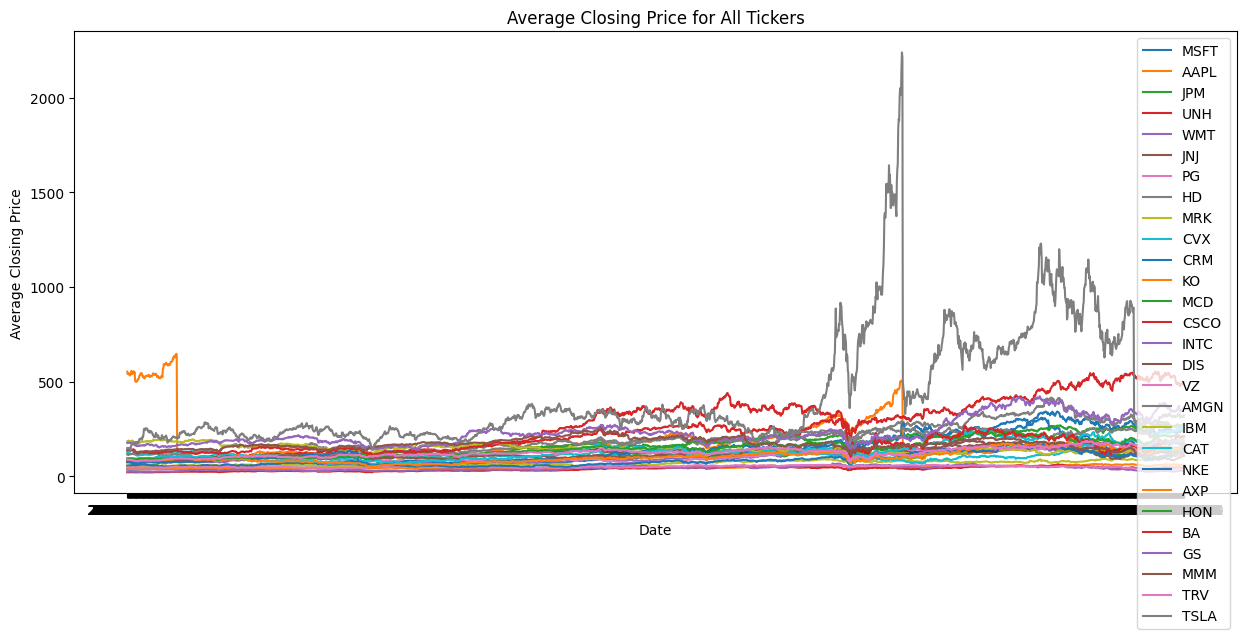

In [15]:
#Visualizing the time series

average_closing_prices = df.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(15, 6))
for ticker in tickers:
    if ticker in df['ticker'].unique():
        plt.plot(average_closing_prices.index, df[df['ticker'] == ticker].groupby('date')['price'].mean(), label=ticker)
plt.title('Average Closing Price for All Tickers')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()

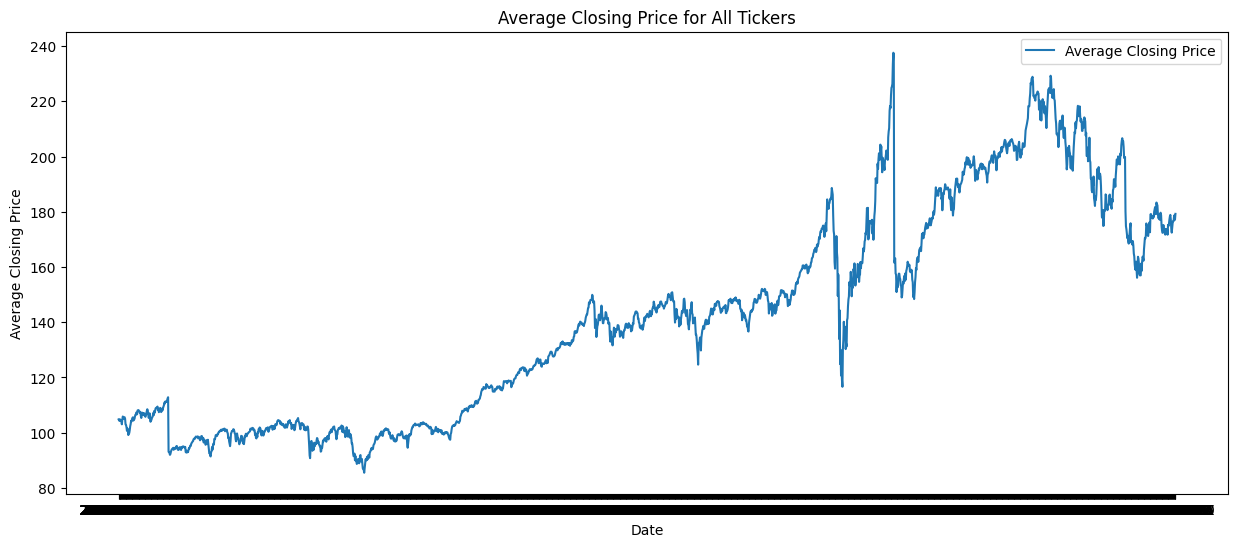

In [16]:
average_closing_price_per_day = df.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_closing_price_per_day.index, average_closing_price_per_day.values, label='Average Closing Price')
plt.title('Average Closing Price for All Tickers')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


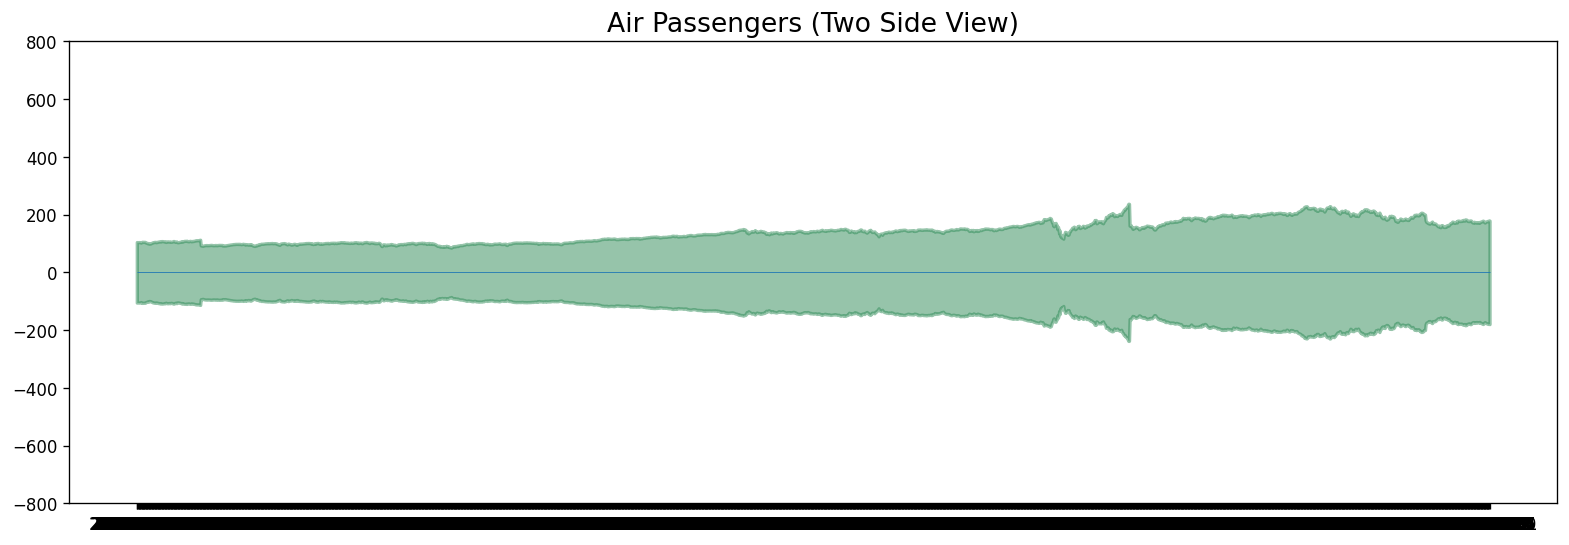

In [20]:
x = average_closing_price_per_day.index
y1 = average_closing_price_per_day.values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['date']), xmax=np.max(df['date']), linewidth=.5)
plt.show()

#### Trend and Seasonality 

Taking the average closing price across all of our tickers, we see that there is a general upward trend except for in the later years which can be explained by the Covid-19 pandemic. There is no clear large scale seasonality that is visible as such in the average closing price of the tickers. 

## to try - check seasonality pre and post covid

### Linear Regression with Time Series

Conducting a time series regression using lag features. To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

Linear regression with a lag feature produces the model:
$$
\text{target} = \text{weight} \times \text{lag} + \text{bias}
$$
So lag features let us fit curves to lag plots where each observation in a series is plotted against the previous observation.

In [44]:
df.set_index('date', inplace=True)
df.head()

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
date,,,,,,,,,,,,,
2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


In [63]:
df_time = df[['ticker', 'price', 'name_price_attention']]
df_time['Lag_price'] = df_time['price'].shift(1)
df_time['Lag_attention'] = df_time['name_price_attention'].shift(1)
#df_time = df_time.reindex(columns=['price', 'Lag_1'])

df_time.head()


/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_41157/1743303577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Lag_price'] = df_time['price'].shift(1)
/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_41157/1743303577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Lag_attention'] = df_time['name_price_attention'].shift(1)


,ticker,price,name_price_attention,Lag_price,Lag_attention
date,,,,,
2014-01-02,MSFT,37.16,3.15,NaN,NaN
2014-01-03,MSFT,36.91,1.54,37.16,3.15
2014-01-06,MSFT,36.13,2.24,36.91,1.54
2014-01-07,MSFT,36.41,1.19,36.13,2.24
2014-01-08,MSFT,35.76,1.68,36.41,1.19


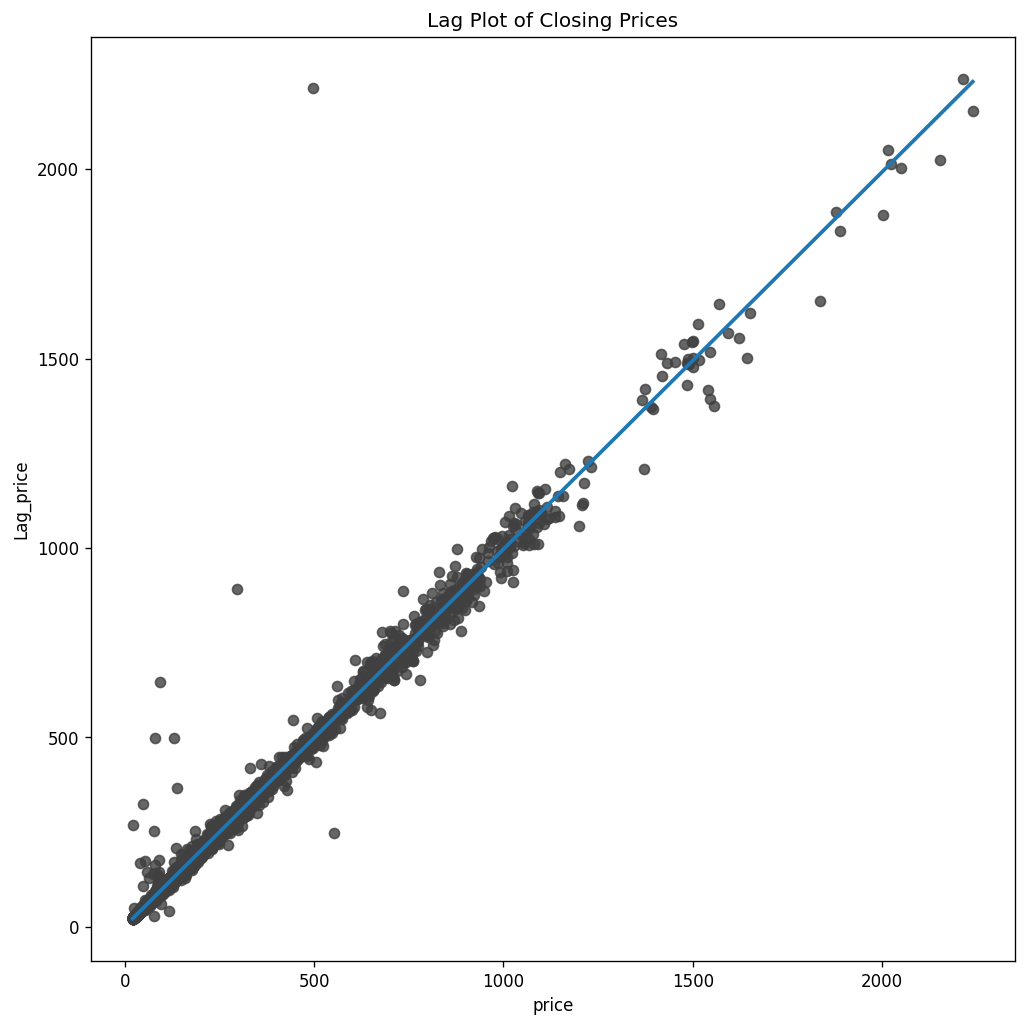

In [64]:
#need to fix this 
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi= 120)
ax = sns.regplot(x='price', y='Lag_price', data=df_time, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Closing Prices')
plt.show()


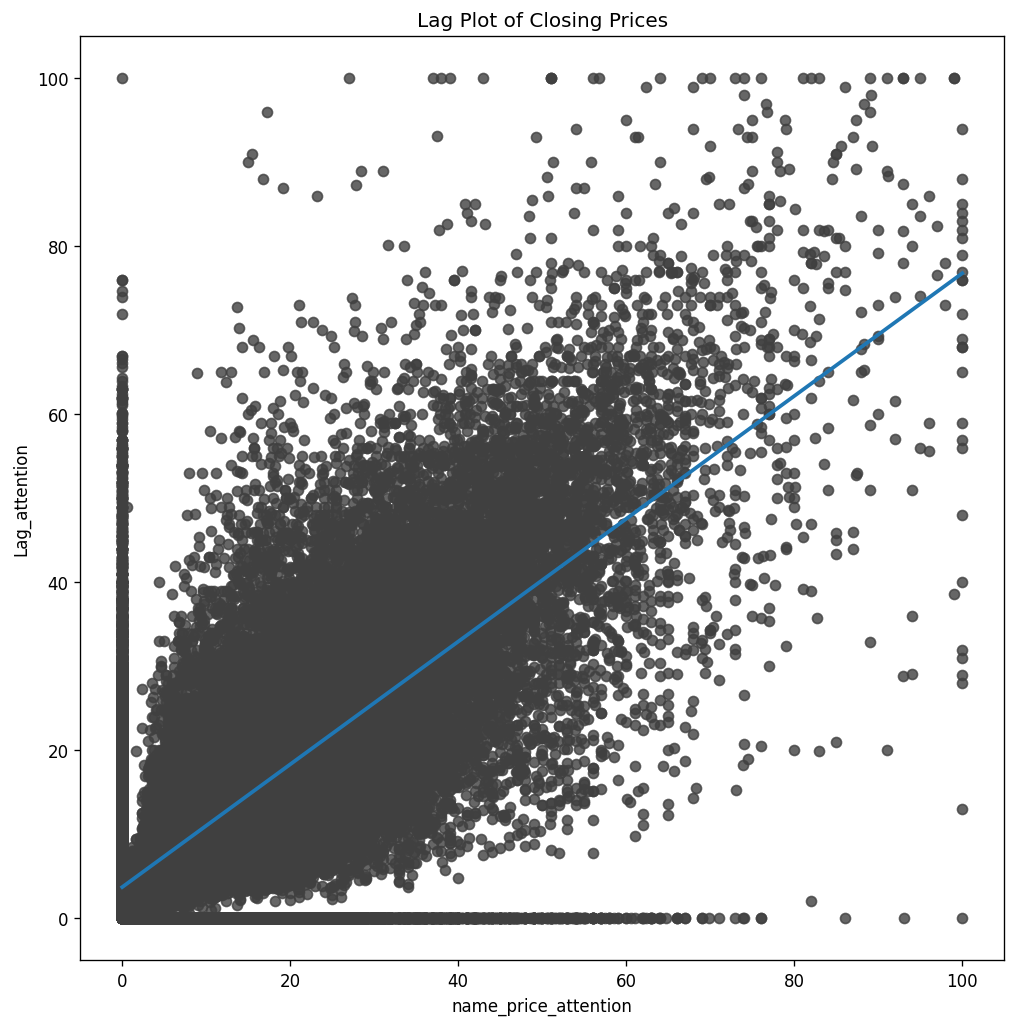

In [65]:
#need to fix this 
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi= 120)
ax = sns.regplot(x='name_price_attention', y='Lag_attention', data=df_time, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Closing Prices')
plt.show()


You can see from the lag plot that sales on one day (Price) are correlated with attention from the previous day (Lag_1).

In [73]:
df['daily_volatility'] = df['price'] - df['open']
df.head()

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention,daily_volatility
date,,,,,,,,,,,,,,
2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15,-0.190
2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54,-0.290
2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24,-0.720
2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19,0.085
2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68,-0.240


In [111]:
df_lag = df.copy()
df_lag['Lag_price'] = df_lag['price'].shift(1)
df_lag['Lag_attention'] = df_lag['name_price_attention'].shift(1)


In [112]:
df_lag.dropna(inplace=True) #removing the last value 

In [113]:
#Splitting the data to pre and post covid 

# Count high volatility points in pre-COVID and post-COVID periods


pre_covid_df = df_lag[df_lag.index < split_date]
post_covid_df = df_lag[df_lag.index >= split_date]


In [114]:
#trying one hot encoding 
split_date = '2020-01-01'


df_lag['Pre-covid'] = (df_lag.index < split_date).astype(int)
df_lag['Post-covid'] = (df_lag.index >= split_date).astype(int)

df_lag.head()

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention,daily_volatility,Lag_price,Lag_attention,Pre-covid,Post-covid
date,,,,,,,,,,,,,,,,,,
2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.910,306353000.0,-0.6728,3.38,1.54,-0.290,37.16,3.15,1,0
2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.500,299879000.0,-2.1133,4.03,2.24,-0.720,36.91,1.54,1,0
2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.350,302203000.0,0.7750,4.94,1.19,0.085,36.13,2.24,1,0
2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.860,296808000.0,-1.7852,5.33,1.68,-0.240,36.41,1.19,1,0
2014-01-09,10107,MSFT,35.53,36215226.0,-0.006432,35.91,35.40,35.880,35.655,294899000.0,-0.6432,3.51,3.50,-0.350,35.76,1.68,1,0


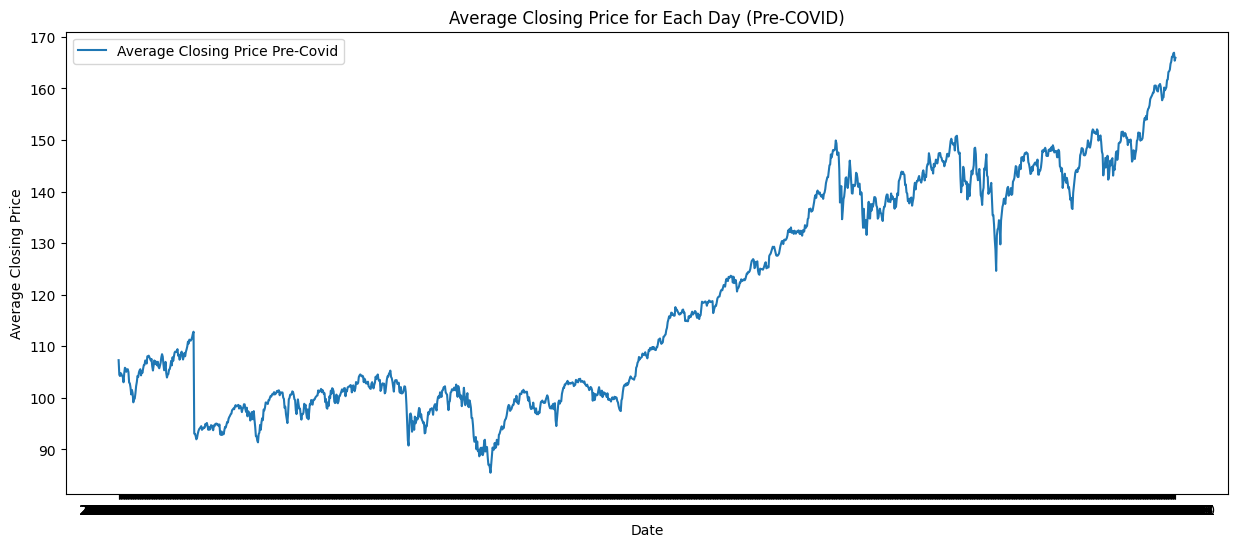

In [150]:
average_closing_prices_pre_covid = df_lag[df_lag['Pre-covid'] == 1].groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_closing_prices_pre_covid.index, average_closing_prices_pre_covid, label='Average Closing Price Pre-Covid')
plt.title('Average Closing Price for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()

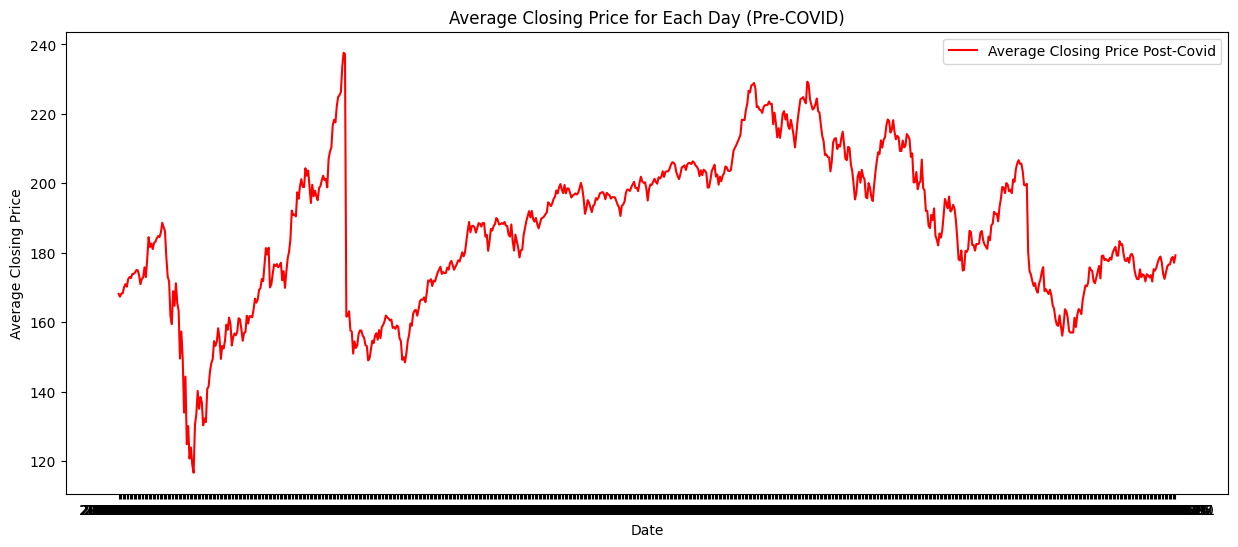

In [152]:
# Calculate average closing prices for each day
average_closing_prices_post_covid = df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_closing_prices_post_covid.index, average_closing_prices_post_covid, label='Average Closing Price Post-Covid',color='red')
plt.title('Average Closing Price for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()

### Putting them into one plot: 

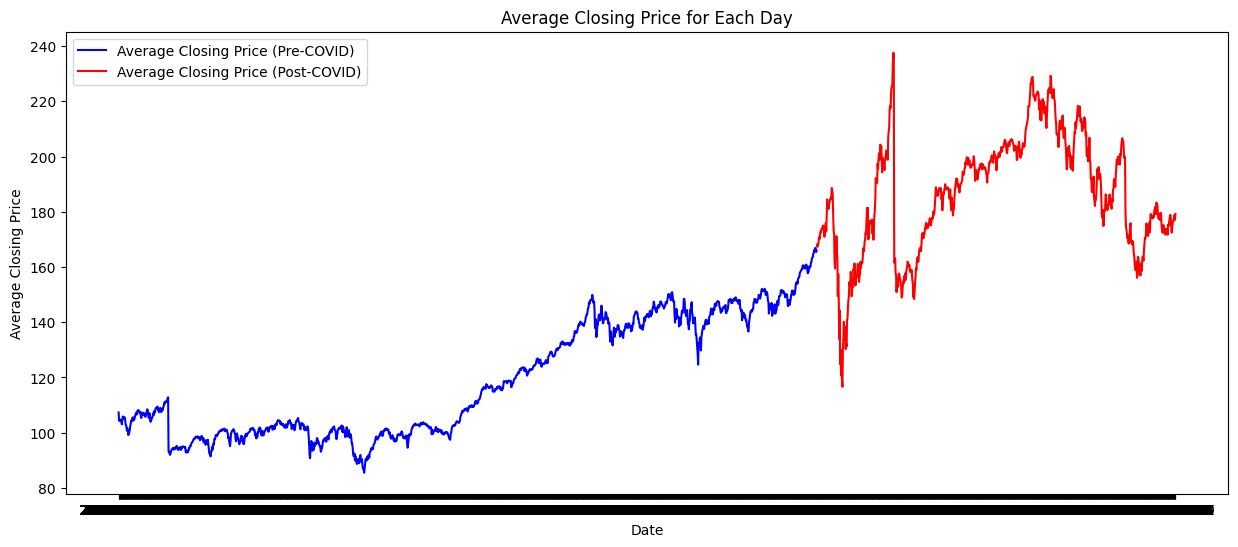

In [153]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_closing_prices_pre_covid.index, average_closing_prices_pre_covid, label='Average Closing Price (Pre-COVID)', color='blue')
plt.plot(average_closing_prices_post_covid.index, average_closing_prices_post_covid, label='Average Closing Price (Post-COVID)', color='red')
plt.title('Average Closing Price for Each Day')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


In [137]:
Min_max_pre = max(df_lag[df_lag['Pre-covid'] == 1].groupby('date')['price'].mean()) - min(df_lag[df_lag['Pre-covid'] == 1].groupby('date')['price'].mean())
print("The difference between the max average closing price and the minimum closing price before Covid was:",Min_max_pre)
Min_max_post = max(df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean()) - min(df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean())
print("The difference between the max average closing price and the minimum closing price after Covid was:",Min_max_post)

The difference between the max average closing price and the minimum closing price before Covid was: 81.45571392857143
The difference between the max average closing price and the minimum closing price after Covid was: 120.99571535714284


In [147]:
pre_cov = df_lag[df_lag['Pre-covid'] == 1].groupby('date')['price'].mean()
post_cov = df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean()
first_last_pre = pre_cov.iloc[-1] - pre_cov.iloc[0]
first_last_post = post_cov.iloc[-1] - post_cov.iloc[0]
print("The difference between the average closing price on Jan 1, 2014 and the average closing price on Dec 31, 2019 is:",first_last_pre)
print("The difference between the average closing price on Jan 1, 2020 and the average closing price on Dec 31, 2023 is:",first_last_post)


The difference between the average closing price on Jan 1, 2014 and the average closing price on Dec 31, 2019 is: 58.64055411375662
The difference between the average closing price on Jan 1, 2020 and the average closing price on Dec 31, 2023 is: 11.10714071428572


As we see clearly, there is a steady growth in the pre-covid average closing prices across all stocks as compared to post-covid where there is much more volatility. We can say that the average closing prices across our tickers trends upwards.

### Time Series for each industry

In [154]:
industry_classification = {
    'AAPL': 'Technology', 
    'CRM': 'Technology', 
    'CSCO': 'Technology', 
    'IBM': 'Technology', 
    'INTC': 'Technology', 
    'MSFT': 'Technology', 
    'TSLA': 'Technology', 
    'AMGN': 'Healthcare', 
    'JNJ': 'Healthcare', 
    'MRK': 'Healthcare', 
    'UNH': 'Healthcare', 
    'AXP': 'Financial Services', 
    'GS': 'Financial Services', 
    'JPM': 'Financial Services', 
    'TRV': 'Financial Services', 
    'Visa': 'Financial Services', 
    'KO': 'Consumer Goods', 
    'MCD': 'Consumer Goods', 
    'NKE': 'Consumer Goods', 
    'WMT': 'Consumer Goods', 
    'BA': 'Industrial', 
    'CAT': 'Industrial', 
    'HD': 'Industrial', 
    'HON': 'Industrial', 
    'MMM': 'Industrial', 
    'CVX': 'Energy', 
    'VZ': 'Telecommunications', 
    'DIS': 'Entertainment'
}


In [157]:
df['industry'] = df['ticker'].map(industry_classification)

# Display the DataFrame with the added 'industry' column
df


,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention,daily_volatility,industry
date,,,,,,,,,,,,,,,
2014-01-02,10107,MSFT,37.16000,30423757.0,-0.006683,37.40000,37.10000,37.35000,37.250000,3.084280e+08,-0.6683,3.25,3.15,-0.19000,Technology
2014-01-03,10107,MSFT,36.91000,30944370.0,-0.006728,37.22000,36.60000,37.20000,36.910000,3.063530e+08,-0.6728,3.38,1.54,-0.29000,Technology
2014-01-06,10107,MSFT,36.13000,43111355.0,-0.021133,36.89000,36.11000,36.85000,36.500000,2.998790e+08,-2.1133,4.03,2.24,-0.72000,Technology
2014-01-07,10107,MSFT,36.41000,35478667.0,0.007750,36.49000,36.21000,36.32500,36.350000,3.022030e+08,0.7750,4.94,1.19,0.08500,Technology
2014-01-08,10107,MSFT,35.76000,59452427.0,-0.017852,36.14000,35.58000,36.00000,35.860000,2.968080e+08,-1.7852,5.33,1.68,-0.24000,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25,93436,TSLA,144.42999,192598292.0,0.003753,146.41000,138.07001,141.90500,142.240005,4.569914e+08,0.3753,41.25,55.48,2.52499,Technology
2023-01-26,93436,TSLA,160.27000,234521497.0,0.109673,161.42000,154.75999,159.96500,158.089995,5.071108e+08,10.9673,55.00,73.00,0.30500,Technology
2023-01-27,93436,TSLA,177.89999,306265655.0,0.110002,180.67999,161.17000,162.42999,170.924995,5.628939e+08,11.0002,42.90,70.81,15.47000,Technology
